**Fake or Real News Classification**

Submited by: Mohammed Fasil P

# Introduction


**Project Introduction:**

In today’s digital age, where information is readily available and widely disseminated, the spread of misinformation, especially fake news, has become a significant issue. Fake news refers to false or misleading information presented as news, often designed to influence public opinion or generate profit through sensationalism. This has raised concerns globally as fake news can impact elections, create social discord, and mislead the public on critical issues such as health, politics, and climate change.

**Project Context and Background:**

This project addresses the growing need for automated systems that can identify fake news and prevent its spread. With advancements in natural language processing (NLP) and machine learning, there is a significant opportunity to build models that can help distinguish between genuine and fake news articles, allowing platforms, researchers, and users to identify potentially misleading content.

**Problem Statement:**

The objective of this project is to develop a classification model that can accurately label news articles as either "Fake" or "Real." Using NLP techniques and machine learning algorithms, we will analyze the textual content of news articles, identifying patterns and features that indicate the likelihood of an article being genuine or fabricated.

## Goal of the Project

The goal of this project is to create a tool that can automatically decide if a news article is "Fake" or "Real" based on its text. By using techniques to analyze language, we hope to help people and platforms recognize misinformation and reduce its spread.

**Target Output:**

The model will read a news article and predict one of two labels:

Fake (1): if the article contains false or misleading information.
Real (0): if the article is legitimate and fact-based.

**Key Metrics to Evaluate Performance:**

To measure how well our tool works, we’ll look at these main scores:

Accuracy: How often the tool correctly labels articles.
Precision: How often articles labeled as "Fake" are actually fake.
Recall: How well the tool catches all the fake news.
F1 Score: A balanced score combining precision and recall, good for imbalanced data.
AUC-ROC: Measures the tool's ability to separate fake from real news accurately across different settings.

## Data Story
Data Set Link: https://drive.google.com/file/d/1e1f7_DyUmyoNF6Bgz5d5To9OYnH2XCf0/view?usp=sharing


For this project, we are using a dataset designed for classifying news articles as either "Fake" or "Real." This dataset provides a rich selection of news headlines and articles, helping us analyze language patterns associated with misleading versus truthful content. The source of the dataset ensures that we have a balanced representation of both types of news, making it ideal for training a machine learning model to recognize fake news.

**Dataset Contents and Structure:**

The dataset contains a selection of key features:

1.   Title: The headline of the news article, often hinting at its overall tone and purpose.
2.   Text: The main content of the article, providing
3.   Label: The target variable that tells us if the   article is "Fake" or "Real," which will be used for training and testing the model.


**Data Types and Structure**

1.   **Title and Text** are text-based (string) features, ideal for natural language processing techniques.
2.   **Label** is a categorical feature, representing the binary outcome (Fake or Real).




# Import Libraries and Load Data Set

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Collection

In [ ]:
data=pd.read_csv('/content/WELFake_Dataset -Minimized(10k).csv')

In [ ]:
data.shape

(10000, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9365 non-null   object
 1   text    9190 non-null   object
 2   label   9042 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


# Data Preprocessing

In [ ]:
df=data

In [ ]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


**Data Cleaning**

Remove Null Rows

In [ ]:
df.isnull().sum()

,0
title,635
text,810
label,958


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
title,0
text,0
label,0


**Remove Duplicate Rows**



In [ ]:
df.duplicated().sum()

107

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-112-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

**Remove non number labels (Target should be 0 or 1)**

In [ ]:
df['label'].count()

8870

In [ ]:
df=df[df['label'].isin(['0','1'])]

In [ ]:
df['label']=df['label'].astype(int)

<ipython-input-116-7b41b362e84b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df['label'].astype(int)


In [ ]:
df['label'].count()

8321

**Append Title and Text**

In [ ]:
df['apnd_txt']=df['title']+" "+df['text']

<ipython-input-118-66cbbd9d81ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['apnd_txt']=df['title']+" "+df['text']


## Text Preprocessing (for NLP)

**Tokenization (splitting text into words)**

In [ ]:
df['new_text']=df['apnd_txt'].apply(word_tokenize)

In [ ]:
df['new_text'].head()

,new_text
0,"[LAW, ENFORCEMENT, ON, HIGH, ALERT, Following,..."
2,"[UNBELIEVABLE, !, OBAMA, ’, S, ATTORNEY, GENER..."
3,"[Bobby, Jindal, ,, raised, Hindu, ,, uses, sto..."
4,"[SATAN, 2, :, Russia, unvelis, an, image, of, ..."
5,"[About, Time, !, Christian, Group, Sues, Amazo..."


**Lowercasing**

In [ ]:
df['new_text']=df['new_text'].apply(lambda x: [i.lower() for i in x])

In [ ]:
df['new_text'].head()

,new_text
0,"[law, enforcement, on, high, alert, following,..."
2,"[unbelievable, !, obama, ’, s, attorney, gener..."
3,"[bobby, jindal, ,, raised, hindu, ,, uses, sto..."
4,"[satan, 2, :, russia, unvelis, an, image, of, ..."
5,"[about, time, !, christian, group, sues, amazo..."


**Removing punctuation**

In [ ]:
import string
df['new_text']=df['new_text'].apply(lambda x: [i for i in x if i not in string.punctuation])

In [ ]:
df['new_text'].head()

,new_text
0,"[law, enforcement, on, high, alert, following,..."
2,"[unbelievable, obama, ’, s, attorney, general,..."
3,"[bobby, jindal, raised, hindu, uses, story, of..."
4,"[satan, 2, russia, unvelis, an, image, of, its..."
5,"[about, time, christian, group, sues, amazon, ..."


**Removing other puctuations like qutes and double quates**

In [ ]:
# Remove all punctuation using regex
df['new_text']= df['new_text'].apply(lambda x: [re.sub(r'[^\w\s]', '', i) for i in x if re.sub(r'[^\w\s]', '', i) != ''])

In [ ]:
df['new_text'].head()

,new_text
0,"[law, enforcement, on, high, alert, following,..."
2,"[unbelievable, obama, s, attorney, general, sa..."
3,"[bobby, jindal, raised, hindu, uses, story, of..."
4,"[satan, 2, russia, unvelis, an, image, of, its..."
5,"[about, time, christian, group, sues, amazon, ..."


**Remove stopwords**

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['new_text']=df['new_text'].apply(lambda x: [i for i in x if i not in stop_words])

In [ ]:
df['new_text'].head()

,new_text
0,"[law, enforcement, high, alert, following, thr..."
2,"[unbelievable, obama, attorney, general, says,..."
3,"[bobby, jindal, raised, hindu, uses, story, ch..."
4,"[satan, 2, russia, unvelis, image, terrifying,..."
5,"[time, christian, group, sues, amazon, splc, d..."


**Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
df['new_text'] = df['new_text'].apply(lambda x: [lemmatizer.lemmatize(i, pos='v') for i in x] )

In [ ]:
df['new_text']=df['new_text'].apply(lambda x: " ".join(x))

In [ ]:
df['new_text'].head()

,new_text
0,law enforcement high alert follow threats cop ...
2,unbelievable obama attorney general say charlo...
3,bobby jindal raise hindu use story christian c...
4,satan 2 russia unvelis image terrify new super...
5,time christian group sue amazon splc designati...


# EDA

**Visualizing the Distribution of News Articles**

In [ ]:
label_count= df['label'].value_counts()

In [ ]:
label_count

,count
label,
1,4299
0,4022


<ipython-input-136-d556623aad90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_count.index,y=label_count.values,palette="magma")


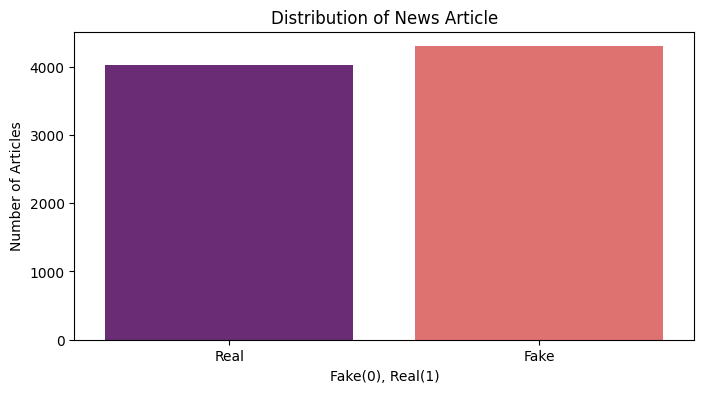

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=label_count.index,y=label_count.values,palette="magma")
plt.title("Distribution of News Article")
plt.xlabel("Fake(0), Real(1)")
plt.ylabel("Number of Articles")
plt.xticks(label_count.index,['Fake','Real'])
plt.show()

*Insights: Real articles is more than Fake articles*

**Data Visualization of texts in Real news using World Cloud**

In [ ]:
def func_wordcloud(x,title):
  wordcloud=WordCloud(
      background_color ='white',
      max_words=300,
      width=800,
      height=400,
      ).generate(x)
  plt.figure(figsize=(14,7))
  plt.title(title).set_fontsize(24)
  plt.imshow(wordcloud)
  plt.show()

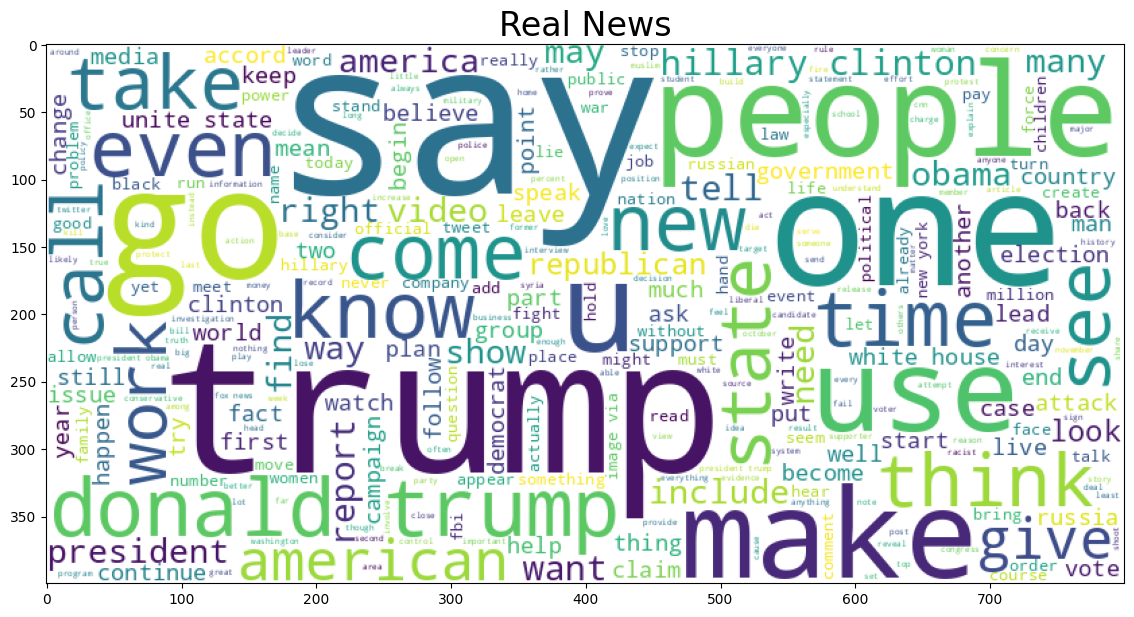

In [ ]:
RealNews=df.loc[df['label']==1,'new_text']
Realtext=' '.join(RealNews)
func_wordcloud(Realtext,"Real News")

*Insights: Most repeated words are "Video,Hilary,Trumb,Obama" in Real News*

**Data Visualization of texts in Fake news using World Cloud**

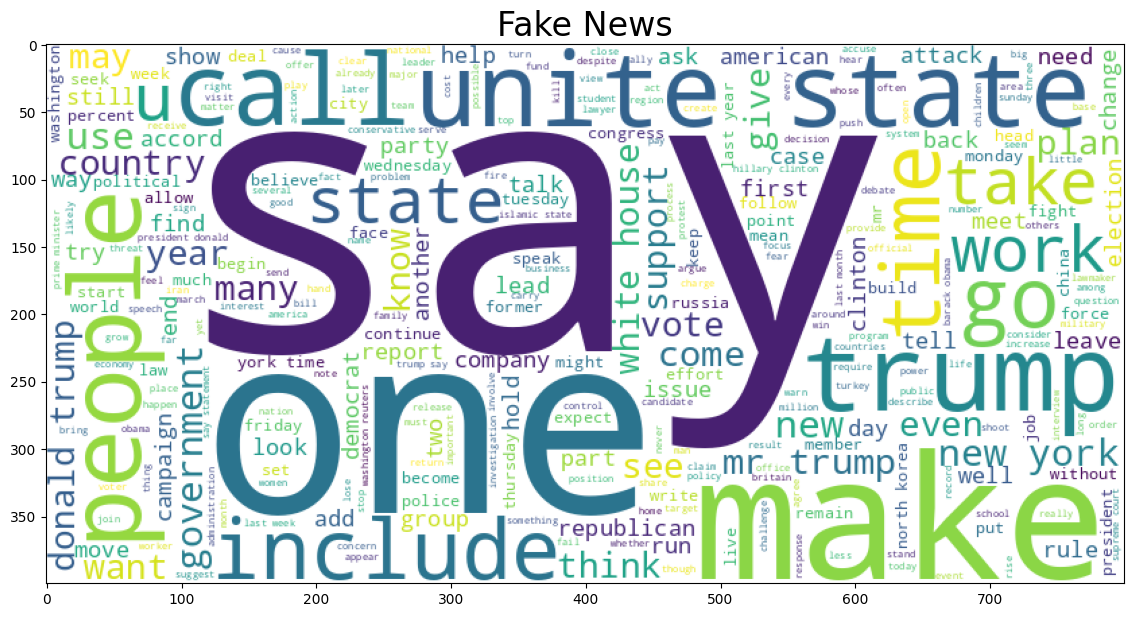

In [ ]:
FakeNews=df.loc[df['label']==0,'new_text']
Faketext=' '.join(FakeNews)
func_wordcloud(Faketext,"Fake News")

*Insights: Most repeated words are "New York,York Times,Trumb" in Real News*

**Analyzing Text Length Distribution**

In [ ]:
df[['new_text','label']].head()

,new_text,label
0,law enforcement high alert follow threats cop ...,1
2,unbelievable obama attorney general say charlo...,1
3,bobby jindal raise hindu use story christian c...,0
4,satan 2 russia unvelis image terrify new super...,1
5,time christian group sue amazon splc designati...,1


In [ ]:
df['text_length']=df['new_text'].apply(len)

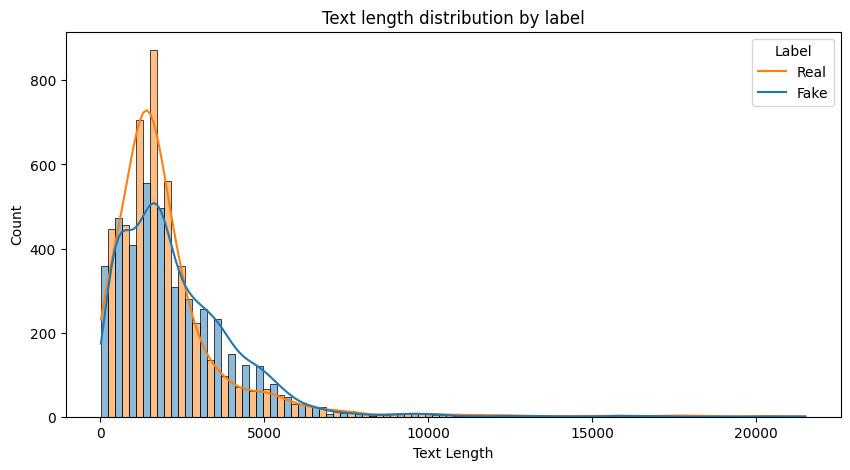

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x="text_length",hue='label',bins=50,multiple='dodge',kde=True)
plt.title("Text length distribution by label")
plt.xlabel("Text Length")
plt.legend(title='Label',labels=['Real','Fake'])
plt.show()

*INSIGHTS: The Fake and Real news articles Text length count is almost are similar but slightly difference*

*Real Artcles are more skewed than Fake Articles*

*Fake Articles text length is appears arount 40 to 100 but Real Articles length is appears arount 40 to 70*

**Remove Data if text length is greater than 7000**

In [ ]:
df=df.loc[df['text_length']<7000]

In [ ]:
df['text_length']=df['new_text'].apply(len)

<ipython-input-144-96e1b52d5056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length']=df['new_text'].apply(len)


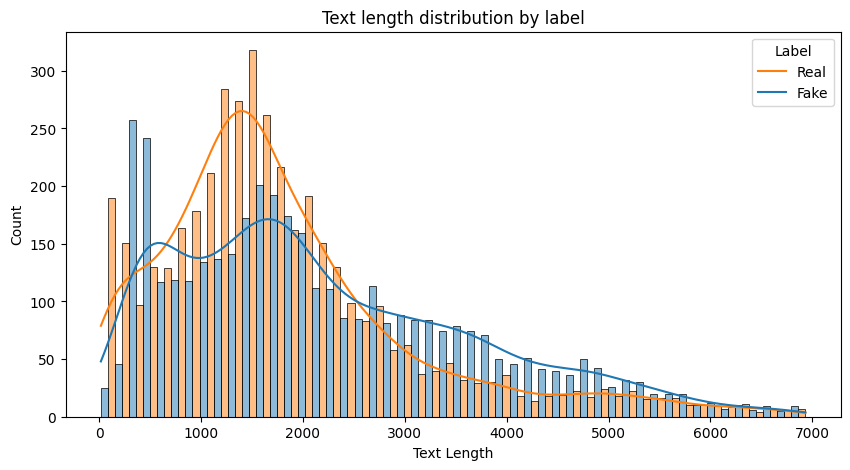

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x="text_length",hue='label',bins=50,multiple='dodge',kde=True)
plt.title("Text length distribution by label")
plt.xlabel("Text Length")
plt.legend(title='Label',labels=['Real','Fake'])
plt.show()

# Feature Extraction ans Label Preperations

**Bag of Words (BoW)**

In [ ]:
vectorizer=CountVectorizer()

In [ ]:
bow_matrix=vectorizer.fit_transform(df['new_text'])

In [ ]:
print("Bow Matrix:\n",bow_matrix.toarray())

Bow Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
bow_matrix.shape

(8127, 87316)

In [ ]:
x=bow_matrix
y=df['label']

**Splitting the Data Set**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(6501, 87316)

In [ ]:
x_test.shape

(1626, 87316)

# Modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

def func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name):
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  prob = model.predict_proba(x_test)[:, 1]

  print(
    'Model Name: ', model_name,"\n",
    'Accuracy: ', accuracy_score(y_test, pred),"\n",
    'Precision: ', precision_score(y_test, pred),"\n",
    'Recall: ', recall_score(y_test, pred),"\n",
    'F1 Score: ', f1_score(y_test, pred),"\n",
    'AUC: ', auc(*roc_curve(y_test, prob)[:2]) # Calculate AUC
    )
  return pred,prob


def fuc_classification_reprt(y_test, pred):
  print("Classification Report: \n",classification_report(y_test, pred))


def func_confusion_matrix(y_test,pred):
  cm=confusion_matrix(y_test,pred)
  print("Confusion Matrix:\n",cm)

  print("Confusion Matrix Heat Map:")
  plt.figure(figsize=(4,3))
  sns.heatmap(data=cm,annot=True,cmap="Reds",xticklabels=['Real','Fake'], yticklabels=['Real','Fake'],fmt="d")
  plt.xlabel("Predicted Lable")
  plt.ylabel("True Lable")
  plt.show


## Training Naive Bayes Model

**Predictions on NB**

In [ ]:
model = MultinomialNB()
model_name="Naive Bayes Model"
pred,prob=func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name)

Model Name:  Naive Bayes Model 
 Accuracy:  0.8733087330873309 
 Precision:  0.90234375 
 Recall:  0.8410194174757282 
 F1 Score:  0.8706030150753769 
 AUC:  0.9256326719608745


**Evaluation of NB predictions**

In [ ]:
fuc_classification_reprt(y_test, pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       802
           1       0.90      0.84      0.87       824

    accuracy                           0.87      1626
   macro avg       0.87      0.87      0.87      1626
weighted avg       0.88      0.87      0.87      1626



**Confusion Matrix**

Confusion Matrix:
 [[727  75]
 [131 693]]
Confusion Matrix Heat Map:


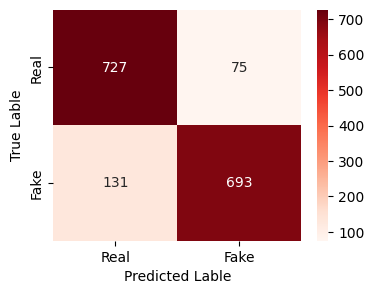

In [ ]:
func_confusion_matrix(y_test,pred)

## Training Random Forest Model

**Predictions on Random Forest**



In [ ]:
model = RandomForestClassifier(n_estimators=500)
model_name="Random Forest Model"
pred,prob=func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name)

Model Name:  Random Forest Model 
 Accuracy:  0.9077490774907749 
 Precision:  0.9099756690997567 
 Recall:  0.9077669902912622 
 F1 Score:  0.9088699878493317 
 AUC:  0.9706505883349879


**Evaluation of RF Classifier Predictions**

In [ ]:
fuc_classification_reprt(y_test, pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       802
           1       0.91      0.91      0.91       824

    accuracy                           0.91      1626
   macro avg       0.91      0.91      0.91      1626
weighted avg       0.91      0.91      0.91      1626



**Confusion Matrix**

Confusion Matrix:
 [[728  74]
 [ 76 748]]
Confusion Matrix Heat Map:


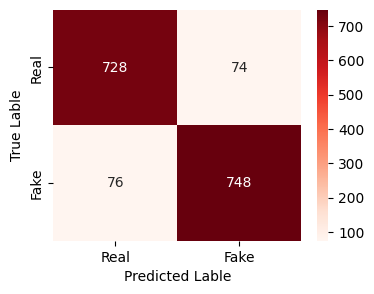

In [ ]:
func_confusion_matrix(y_test,pred)

## Training Logistic Regression Model

**Predictions on Logistic Regression Model**

In [ ]:
model = LogisticRegression()
model_name="Logistic Regressiont Model"
pred,prob=func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name)

Model Name:  Logistic Regressiont Model 
 Accuracy:  0.9274292742927429 
 Precision:  0.9283980582524272 
 Recall:  0.9283980582524272 
 F1 Score:  0.9283980582524272 
 AUC:  0.973653548168414


**Evaluation of Logistic Regression predictions**

In [ ]:
fuc_classification_reprt(y_test, pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       802
           1       0.93      0.93      0.93       824

    accuracy                           0.93      1626
   macro avg       0.93      0.93      0.93      1626
weighted avg       0.93      0.93      0.93      1626



**Confusion Matrix**

Confusion Matrix:
 [[743  59]
 [ 59 765]]
Confusion Matrix Heat Map:


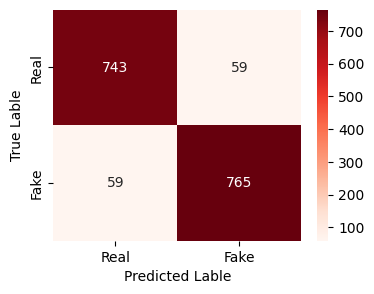

In [ ]:
func_confusion_matrix(y_test,pred)

## Training XGBoost Model

**Predictions on XGBoost Model**

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_name="XGBoost Model"
pred,prob=func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Name:  XGBoost Model 
 Accuracy:  0.9501845018450185 
 Precision:  0.9449101796407186 
 Recall:  0.9575242718446602 
 F1 Score:  0.9511754068716094 
 AUC:  0.9903094206231993


**Evaluation of XGBoost predictions**

In [ ]:
fuc_classification_reprt(y_test, pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       802
           1       0.94      0.96      0.95       824

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626



**Confusion Matrix**

Confusion Matrix:
 [[756  46]
 [ 35 789]]
Confusion Matrix Heat Map:


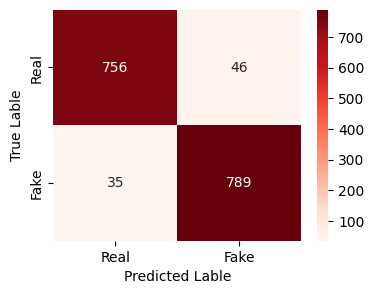

In [ ]:
func_confusion_matrix(y_test,pred)

## Training  Artificial neural network Model

In [ ]:
model = MLPClassifier(max_iter=20)
model_name="ANN Model"
pred,prob=func_train_and_evaluate(model,x_test,y_test,x_train,y_train,model_name)

Model Name:  ANN Model 
 Accuracy:  0.9212792127921279 
 Precision:  0.9223300970873787 
 Recall:  0.9223300970873787 
 F1 Score:  0.9223300970873787 
 AUC:  0.9647347045008837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**Evaluation of ANN Model predictions**

In [ ]:
fuc_classification_reprt(y_test, pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       802
           1       0.92      0.92      0.92       824

    accuracy                           0.92      1626
   macro avg       0.92      0.92      0.92      1626
weighted avg       0.92      0.92      0.92      1626



**Confusion Matrix**

Confusion Matrix:
 [[738  64]
 [ 64 760]]
Confusion Matrix Heat Map:


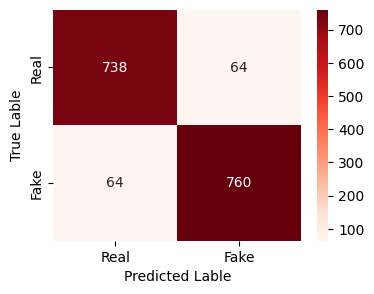

In [ ]:
func_confusion_matrix(y_test,pred)

# Hyperparameter Tuning

In [ ]:
# Dictionary to store best models
best_models = {}

# Define hyperparameter grids for each model
param_grids = {
    "ANN Model": {
        'hidden_layer_sizes': [(16,)],
        'max_iter': [20],
        'alpha': [0.0001, 0.001, 0.01],
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'reg_lambda': [0, 0.1, 1],
    },
    "Naive Bayes": {
    }
}

# Define models
models = {
    "ANN Model": MLPClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop over each model and perform RandomizedSearchCV
for model_name, model in models.items():
    param_distributions = param_grids[model_name]
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                           n_iter=10, cv=2, n_jobs=1, random_state=42)
    randomized_search.fit(x_train, y_train)

    # Store the best model in the dictionary
    best_models[model_name] = randomized_search.best_estimator_

    # Print the best hyperparameters
    print(f"{model_name} Best Hyperparameters: {randomized_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_percept

ANN Model Best Hyperparameters: {'max_iter': 20, 'hidden_layer_sizes': (16,), 'alpha': 0.01}
Logistic Regression Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Best Hyperparameters: {'n_estimators': 100, 'max_depth': 20}
Naive Bayes Best Hyperparameters: {}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:45] WARNING: /workspace/src/learner.cc:740: 
Para

XGBoost Best Hyperparameters: {'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 10}


In [ ]:
print(f"{model_name} Best Hyperparameters: {randomized_search.best_params_}")
print(f"{model_name} Best Score: {randomized_search.best_score_}")

XGBoost Best Hyperparameters: {'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 10}
XGBoost Best Score: 0.9395484466318056


# Evaluation

In [ ]:
# Store the best model in the dictionary
best_models[model_name] = randomized_search.best_estimator_
print(f" Best Model is {best_models[model_name]}")

 Best Model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [ ]:
best_models[model_name]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Observation:

Best Overall Model: XGBoost stands out as the best-performing model with a test accuracy of 0.95, precision of 0.9965, recall of 0.9981, F1 score of 0.9973, and AUC of 0.9998. This indicates that XGBoost effectively captures both positive and negative classes with minimal errors.

# Save the Best Model

In [ ]:
# Save the best model
model_filename = f"{model_name.replace(' ', '_')}_best_model.joblib"
joblib.dump(randomized_search.best_estimator_, model_filename)

print(f"{model_name} Best Hyperparameters: {randomized_search.best_params_}")
print(f"{model_name} model saved as {model_filename}")

XGBoost Best Hyperparameters: {'reg_lambda': 0.1, 'n_estimators': 100, 'max_depth': 10}
XGBoost model saved as XGBoost_best_model.joblib
